In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
aviation_data = pd.read_csv('../datasets/aviation_data.csv')

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

In [4]:
aviation_data.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N,HasSafetyRec,ReportType,OriginalPublishDate,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,EventID,Latitude,Longitude,Make,Model,AirCraftCategory,AirportID,AirportName,AmateurBuilt,NumberOfEngines,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,ReportStatus,RepGenFlag,DocketUrl,DocketPublishDate,Unnamed: 37
0,ERA24LA019,ACC,193301,2023-10-25T09:57:00Z,Atlanta,Georgia,United States,NaN,N7981E,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,CESSNA,150,AIR,CCO,Newnan Coweta County Airport,FALSE,1,NaN,INST,091,NaN,VMC,NaN,In work,False,NaN,NaN,NaN
1,CEN24LA020,ACC,193291,2023-10-23T15:11:00Z,Pierre,South Dakota,United States,NaN,N92884,False,DirectorBrief,NaN,Fatal,1,1,0,NaN,NaN,0.0,0.0,PIPER,PA 46-350P,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,NaN,In work,False,NaN,NaN,NaN
2,CEN24LA023,ACC,193305,2023-10-22T19:00:00Z,Union charter Township,Michigan,United States,NaN,N8088E,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,PIPER,PA-28-201T,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,NaN,In work,False,NaN,NaN,NaN
3,WPR24FA018,ACC,193276,2023-10-20T17:01:00Z,Covelo,California,United States,NaN,N8248K,False,DirectorBrief,NaN,Fatal,2,0,0,NaN,NaN,0.0,0.0,BEECH,A36,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,PLANE HAVEN LLC,In work,False,NaN,NaN,NaN
4,ERA24LA015,ACC,193282,2023-10-20T16:00:00Z,Tellico Plains,Tennessee,United States,NaN,N958TW,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,AVIAT AIRCRAFT INC,A-1C-200,AIR,NONE,NaN,FALSE,1,NaN,PERS,091,NaN,VMC,NaN,In work,False,NaN,NaN,NaN


In [46]:
aviation_data['Make']= aviation_data['Make'].str.lower()

In [47]:
make_air = pd.DataFrame(aviation_data['Make'].unique())

In [48]:
make_air.to_csv('make_air.csv', index=False)

In [51]:
aviation_data['Make'].shape

(89505,)

Is there a relationship between make, number of engines.

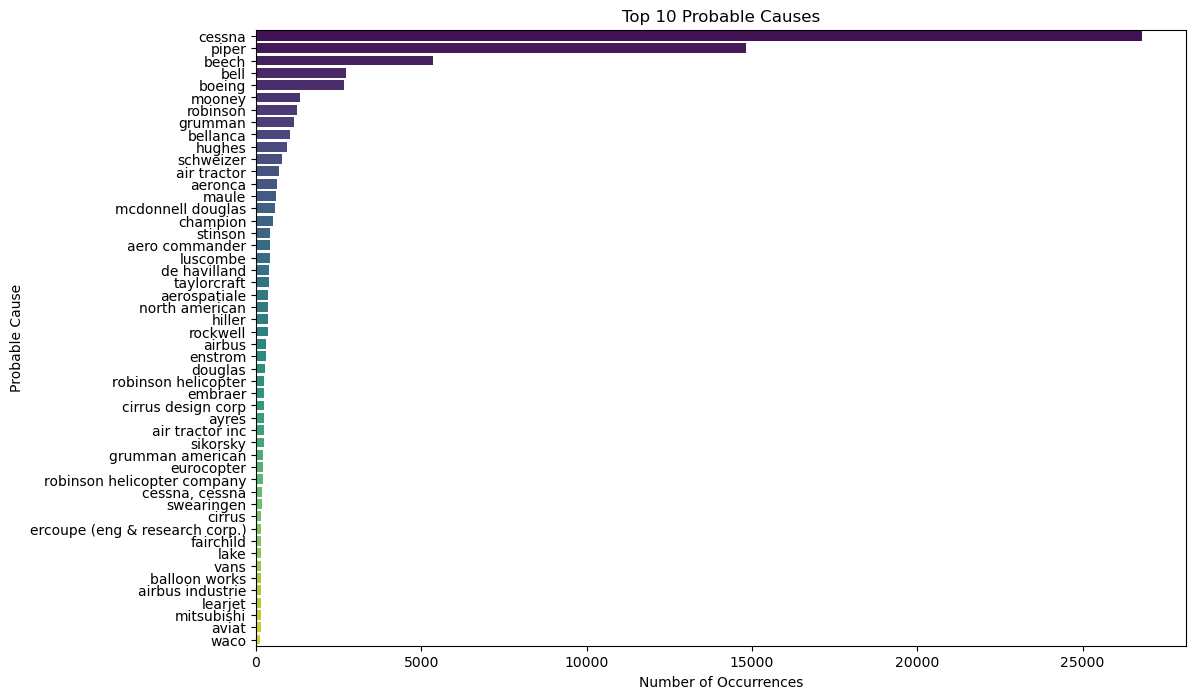

In [50]:
top_causes = aviation_data['Make'].value_counts().head(50)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.title("Top 10 Probable Causes")
plt.xlabel("Number of Occurrences")
plt.ylabel("Probable Cause")
plt.show()

In [ ]:
cessna = aviation_data[aviation_data['Make'] == 'cessna']
cessna

What is the commanality here, could be the engion type.

Boeing: Commonly uses engines from manufacturers like General Electric, Rolls-Royce, and Pratt & Whitney.

Airbus: Uses engines from CFM International (a joint venture of General Electric and Safran Aircraft Engines), Rolls-Royce, and Pratt & Whitney.

Bombardier: Has used engines from Pratt & Whitney for its C Series (now Airbus A220).

Embraer: Uses engines from Pratt & Whitney for its E-Jet E2 series.

Cessna: Depending on the aircraft model, Cessna uses engines from various manufacturers, including Continental Motors and Lycoming.

Piper: Primarily uses engines from Lycoming and sometimes from Continental Motors.

In [5]:
aviation_data.shape

(89505, 38)

In [6]:
aviation_data.describe()

,Mkey,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,EventID,Latitude,Longitude,Unnamed: 37
count,89505.000000,89505.000000,89505.000000,89505.000000,0.0,8.950500e+04,8.950500e+04,0.0
mean,52721.064209,0.547355,0.212256,0.338931,NaN,1.285408e+03,-7.657945e+01,NaN
std,33341.346545,4.902895,1.090214,2.307135,NaN,2.182867e+05,8.431713e+03,NaN
min,2292.000000,0.000000,0.000000,0.000000,NaN,-7.801694e+01,-1.004241e+06,NaN
25%,25031.000000,0.000000,0.000000,0.000000,NaN,2.986805e+01,-1.119175e+02,NaN
50%,50203.000000,0.000000,0.000000,0.000000,NaN,3.622666e+01,-9.064059e+01,NaN
75%,75937.000000,0.000000,0.000000,0.000000,NaN,4.159992e+01,-7.785972e+01,NaN
max,193305.000000,349.000000,111.000000,380.000000,NaN,4.351118e+07,7.457204e+05,NaN


In [7]:
aviation_data.select_dtypes(exclude = np.number).describe()

,NtsbNo,EventType,EventDate,City,State,Country,ReportNo,N,HasSafetyRec,ReportType,OriginalPublishDate,HighestInjuryLevel,ProbableCause,Make,Model,AirCraftCategory,AirportID,AirportName,AmateurBuilt,NumberOfEngines,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,ReportStatus,RepGenFlag,DocketUrl,DocketPublishDate
count,89505,89505,89505,89444,82309,89008,216,89410,89505,89503,70460,88974,60385,89443,89416,88864,50547,53089,89505,83447,12739,83133,88822,88926,84688,43740,83034,89505,22081,22081
unique,89505,3,87383,22486,57,189,214,81075,2,4,2187,4,56804,9173,13511,40,10534,25342,7,39,3,130,81,30,3,37702,2,1,22081,19012
top,ERA24LA019,ACC,1987-12-10T10:30:00Z,ANCHORAGE,California,United States,AAR8903,UNREG,False,DirectorBrief,2020-11-03T05:00:00Z,None,A loss of engine power for undetermined reasons.,CESSNA,152,AIR,NONE,Private,FALSE,1,NSCH,PERS,091,Substantial,VMC,",",Completed,False,https://data.ntsb.gov/Docket?ProjectID=193042,10/9/2020 5:40:27 PM
freq,1,85540,4,361,8795,82429,2,521,88843,82690,1046,48268,124,18498,2273,76092,1489,249,79934,69233,4645,49217,70270,64154,77626,480,81839,89505,1,44


In [8]:
aviation_data2 = aviation_data.copy()

In [9]:
intial_X = aviation_data2.dropna(subset=['ProbableCause'])

In [10]:
aviation_data2.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N,HasSafetyRec,ReportType,OriginalPublishDate,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,EventID,Latitude,Longitude,Make,Model,AirCraftCategory,AirportID,AirportName,AmateurBuilt,NumberOfEngines,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,ReportStatus,RepGenFlag,DocketUrl,DocketPublishDate,Unnamed: 37
0,ERA24LA019,ACC,193301,2023-10-25T09:57:00Z,Atlanta,Georgia,United States,NaN,N7981E,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,CESSNA,150,AIR,CCO,Newnan Coweta County Airport,FALSE,1,NaN,INST,091,NaN,VMC,NaN,In work,False,NaN,NaN,NaN
1,CEN24LA020,ACC,193291,2023-10-23T15:11:00Z,Pierre,South Dakota,United States,NaN,N92884,False,DirectorBrief,NaN,Fatal,1,1,0,NaN,NaN,0.0,0.0,PIPER,PA 46-350P,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,NaN,In work,False,NaN,NaN,NaN
2,CEN24LA023,ACC,193305,2023-10-22T19:00:00Z,Union charter Township,Michigan,United States,NaN,N8088E,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,PIPER,PA-28-201T,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,NaN,In work,False,NaN,NaN,NaN
3,WPR24FA018,ACC,193276,2023-10-20T17:01:00Z,Covelo,California,United States,NaN,N8248K,False,DirectorBrief,NaN,Fatal,2,0,0,NaN,NaN,0.0,0.0,BEECH,A36,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,PLANE HAVEN LLC,In work,False,NaN,NaN,NaN
4,ERA24LA015,ACC,193282,2023-10-20T16:00:00Z,Tellico Plains,Tennessee,United States,NaN,N958TW,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,AVIAT AIRCRAFT INC,A-1C-200,AIR,NONE,NaN,FALSE,1,NaN,PERS,091,NaN,VMC,NaN,In work,False,NaN,NaN,NaN


In [ ]:
[intial_X[column].fillna(intial_X[column].mode()[0], inplace=True) for column in intial_X.select_dtypes(include=['object']).columns]
[intial_X[column].fillna(intial_X[column].mean(), inplace=True) for column in intial_X.select_dtypes(include=['float64', 'int64']).columns]

In [13]:
aviation_data2.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N,HasSafetyRec,ReportType,OriginalPublishDate,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,EventID,Latitude,Longitude,Make,Model,AirCraftCategory,AirportID,AirportName,AmateurBuilt,NumberOfEngines,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,ReportStatus,RepGenFlag,DocketUrl,DocketPublishDate,Unnamed: 37
0,ERA24LA019,ACC,193301,2023-10-25T09:57:00Z,Atlanta,Georgia,United States,NaN,N7981E,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,CESSNA,150,AIR,CCO,Newnan Coweta County Airport,FALSE,1,NaN,INST,091,NaN,VMC,NaN,In work,False,NaN,NaN,NaN
1,CEN24LA020,ACC,193291,2023-10-23T15:11:00Z,Pierre,South Dakota,United States,NaN,N92884,False,DirectorBrief,NaN,Fatal,1,1,0,NaN,NaN,0.0,0.0,PIPER,PA 46-350P,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,NaN,In work,False,NaN,NaN,NaN
2,CEN24LA023,ACC,193305,2023-10-22T19:00:00Z,Union charter Township,Michigan,United States,NaN,N8088E,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,PIPER,PA-28-201T,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,NaN,In work,False,NaN,NaN,NaN
3,WPR24FA018,ACC,193276,2023-10-20T17:01:00Z,Covelo,California,United States,NaN,N8248K,False,DirectorBrief,NaN,Fatal,2,0,0,NaN,NaN,0.0,0.0,BEECH,A36,NaN,NaN,NaN,FALSE,NaN,NaN,PERS,091,NaN,NaN,PLANE HAVEN LLC,In work,False,NaN,NaN,NaN
4,ERA24LA015,ACC,193282,2023-10-20T16:00:00Z,Tellico Plains,Tennessee,United States,NaN,N958TW,False,DirectorBrief,NaN,None,0,0,0,NaN,NaN,0.0,0.0,AVIAT AIRCRAFT INC,A-1C-200,AIR,NONE,NaN,FALSE,1,NaN,PERS,091,NaN,VMC,NaN,In work,False,NaN,NaN,NaN


In [14]:
aviation_data_encoded = pd.get_dummies(intial_X, columns=['WeatherCondition', 'Make', 'Model', 'AirCraftCategory', 
                                                                      'NumberOfEngines', 'PurposeOfFlight', 'AirCraftDamage', 
                                                                      'HighestInjuryLevel'])


In [15]:
#Unnecessary Columns
columns_to_drop = ['NtsbNo', 'Mkey', 'ReportNo', 'EventID', 'City', 'State', 'Country', 'ReportType', 
                   'OriginalPublishDate', 'AirportID', 'AirportName', 'FAR', 'Operator', 'ReportStatus', 
                   'DocketUrl', 'DocketPublishDate', 'Unnamed: 37', 'N', 'EventType', 'EventDate', 'HasSafetyRec', 
                   'RepGenFlag']

In [16]:
aviation_data_encoded = aviation_data_encoded.drop(columns=columns_to_drop)


In [1]:
#aviation_data_encoded.head()

Lets see Top 10 Causes.

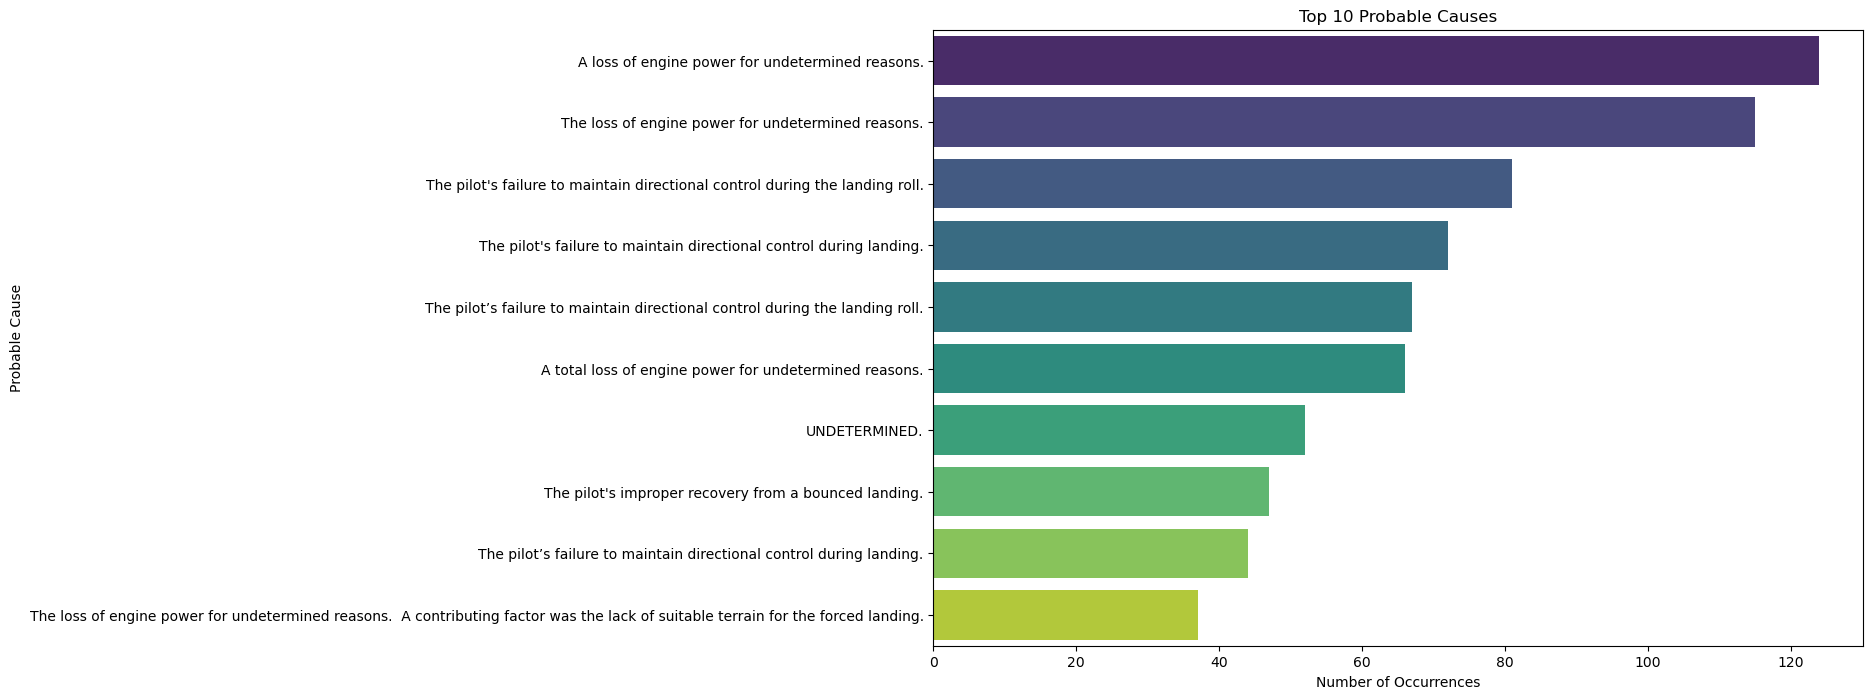

In [18]:
top_causes = aviation_data_encoded['ProbableCause'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.title("Top 10 Probable Causes")
plt.xlabel("Number of Occurrences")
plt.ylabel("Probable Cause")
plt.show()


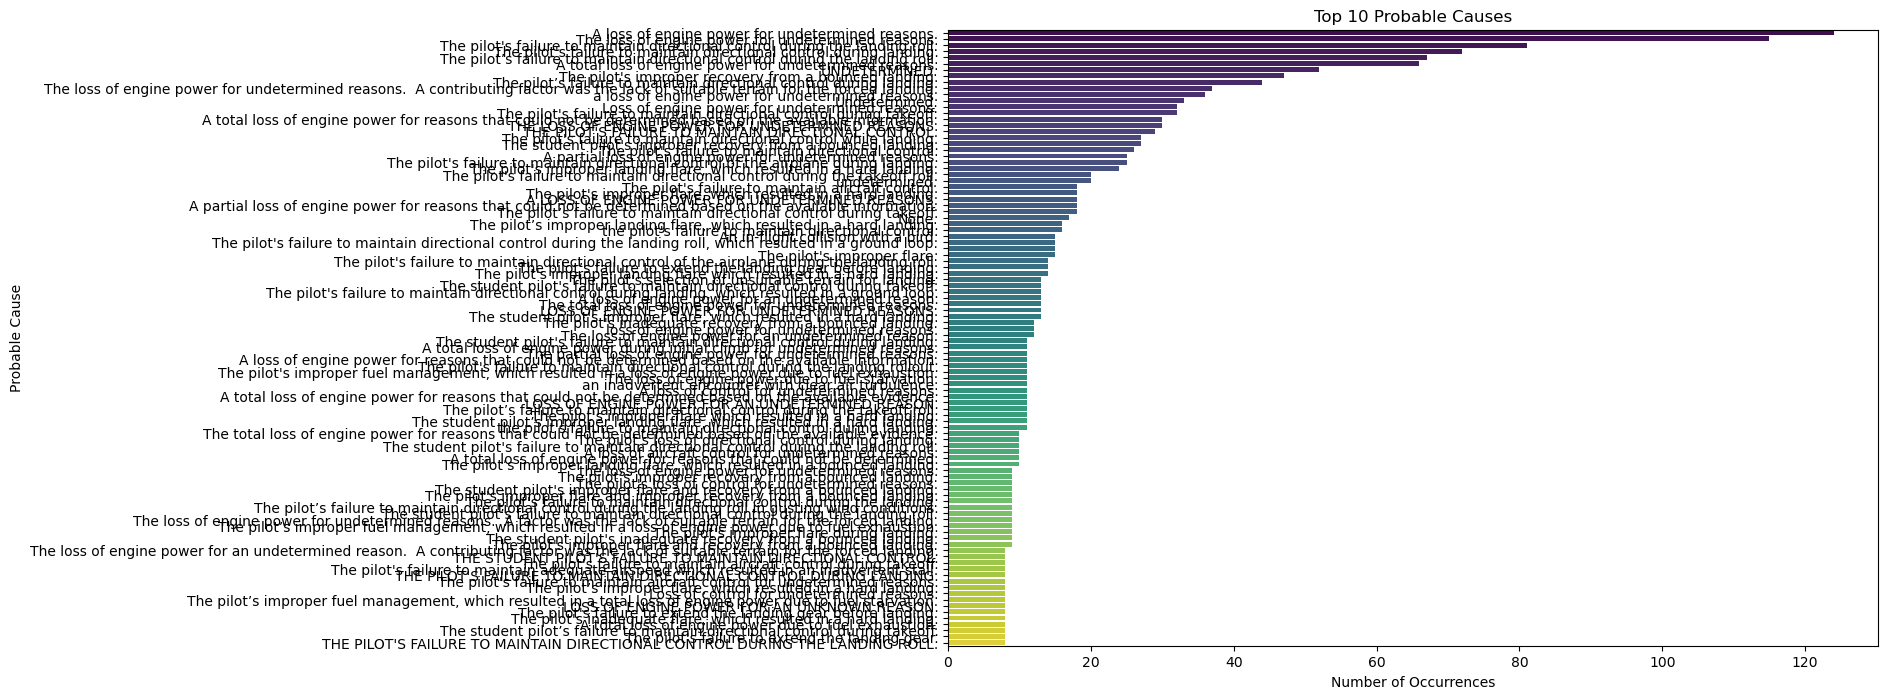

In [19]:
top_causes = aviation_data_encoded['ProbableCause'].value_counts().head(100)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.title("Top 10 Probable Causes")
plt.xlabel("Number of Occurrences")
plt.ylabel("Probable Cause")
plt.show()

In [20]:
engine_related_data = aviation_data_encoded[aviation_data_encoded['ProbableCause'].str.contains('engine', case=False)]


In [ ]:
engine_related_data.head()

In [24]:

aviation_data_encoded['ProbableCause'] = aviation_data_encoded['ProbableCause'].apply(
    lambda x: 'Engine-related' if 'engine' in x.lower() else x)

top_causes_updated = aviation_data_encoded['ProbableCause'].value_counts().head(10)
top_causes_updated


Engine-related                                                                  12708
The pilot's failure to maintain directional control during the landing roll.       81
The pilot's failure to maintain directional control during landing.                72
The pilot’s failure to maintain directional control during the landing roll.       67
UNDETERMINED.                                                                      52
The pilot's improper recovery from a bounced landing.                              47
The pilot’s failure to maintain directional control during landing.                44
Undetermined.                                                                      33
The pilot's failure to maintain directional control during takeoff.                32
THE PILOT'S FAILURE TO MAINTAIN DIRECTIONAL CONTROL.                               29
Name: ProbableCause, dtype: int64

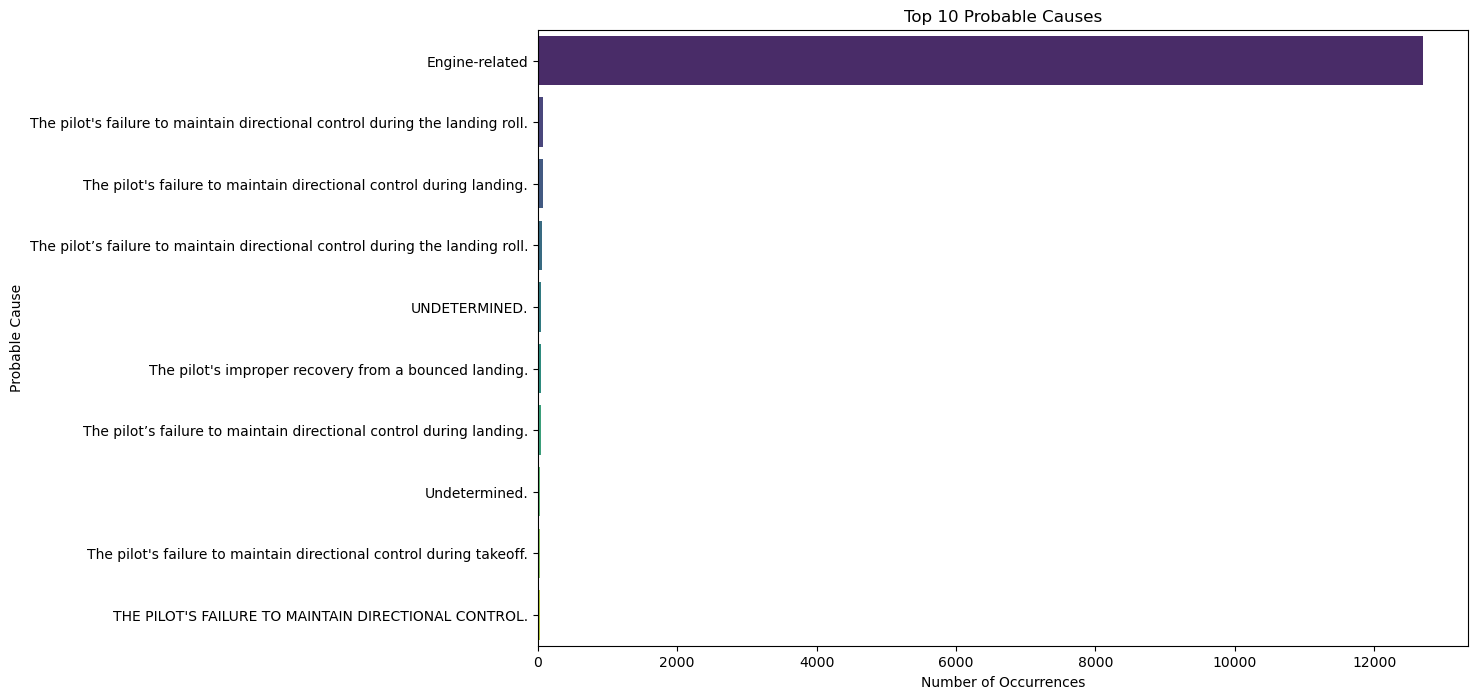

In [25]:
top_causes = aviation_data_encoded['ProbableCause'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_causes.values, y=top_causes.index, palette="viridis")
plt.title("Top 10 Probable Causes")
plt.xlabel("Number of Occurrences")
plt.ylabel("Probable Cause")
plt.show()
